## Sommaire

Nous utiliserons l'ensemble de données [Ames Housing](http://jse.amstat.org/v19n3/decock.pdf) qui a été compilé pour la première fois par Dean De Cock. Il s'agit d'un ensemble de 1 460 maisons résidentielles à Ames, dans l'Iowa, chacune décrite par 80 caractéristiques. Nous l'utiliserons pour prédire le prix final des maisons. Dans cet exemple, nous n'utiliserons que les **n** caractéristiques les plus intéressantes.



## Importation des library

In [3]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             max_error,
                            )
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Importation des données

In [5]:
data= pd.read_csv("C:\\Users\\USER\\Downloads\\train.csv", sep=",")

In [6]:
data = data.drop('Id', axis=1)
data.head(3)
data.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.00000

## EDA: Exploratory Data Analysis

### Data summary

In [9]:
#pourcentage des données manquantes pour chaque variable
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)


MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64


In [10]:
# Sélection des colonnes avec plus de 50 % de valeurs manquantes
columns = missing_percentage[missing_percentage > 30].index


# Affichage des colonnes 
print(f"Colonnes  : {columns}")

Colonnes  : Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


les NA definissent des modalités pour l'ensemble des variables representées donc on les considère pas comme des vrais 'Na'

In [12]:
y= data['SalePrice']

In [13]:
missing_percentage_x = (data['SalePrice'].isnull().sum() / len(data)) * 100
print(f"Le pourcentage de valeurs manquantes pour la variable cible est : {missing_percentage_x:.2f}%")


Le pourcentage de valeurs manquantes pour la variable cible est : 0.00%


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


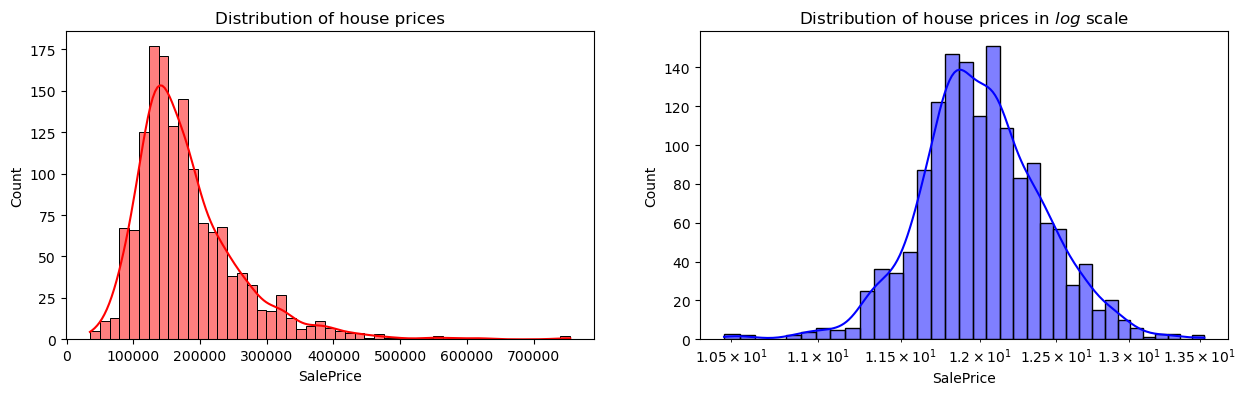

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(y, color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution of house prices')

log_y = np.log(y)
sns.histplot(log_y, color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution of house prices in $log$ scale')
axes[1].set_xscale('log');

Si nous regardons le graphique de gauche, le prix de vente de la maison varie de 34900 à 755000, le graphique est asymétrique à gauche. Pour la suite de l'analyse, nous appliquerons le logarithme à la variable cible « charges ». La normalité est une hypothèse importante pour de nombreuses techniques statistiques.

- `log` est une transformation particulière de Box-Cox
- (transformation de Box-Cox)(https://www.statisticshowto.com/box-cox-transformation/) : Une transformation de Box-Cox est un moyen de transformer des variables dépendantes non normales en une forme normale.


In [16]:
#recuperation des variables categorielles 
categorical_features = data.select_dtypes(include="object").columns
print(f"Categorical features:\n {categorical_features}\n")
#recuperation des variables numerique
numerical_features = data.select_dtypes(include="number").columns
print(f"Numerical features:\n {numerical_features}")

Categorical features:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Numerical features:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBat

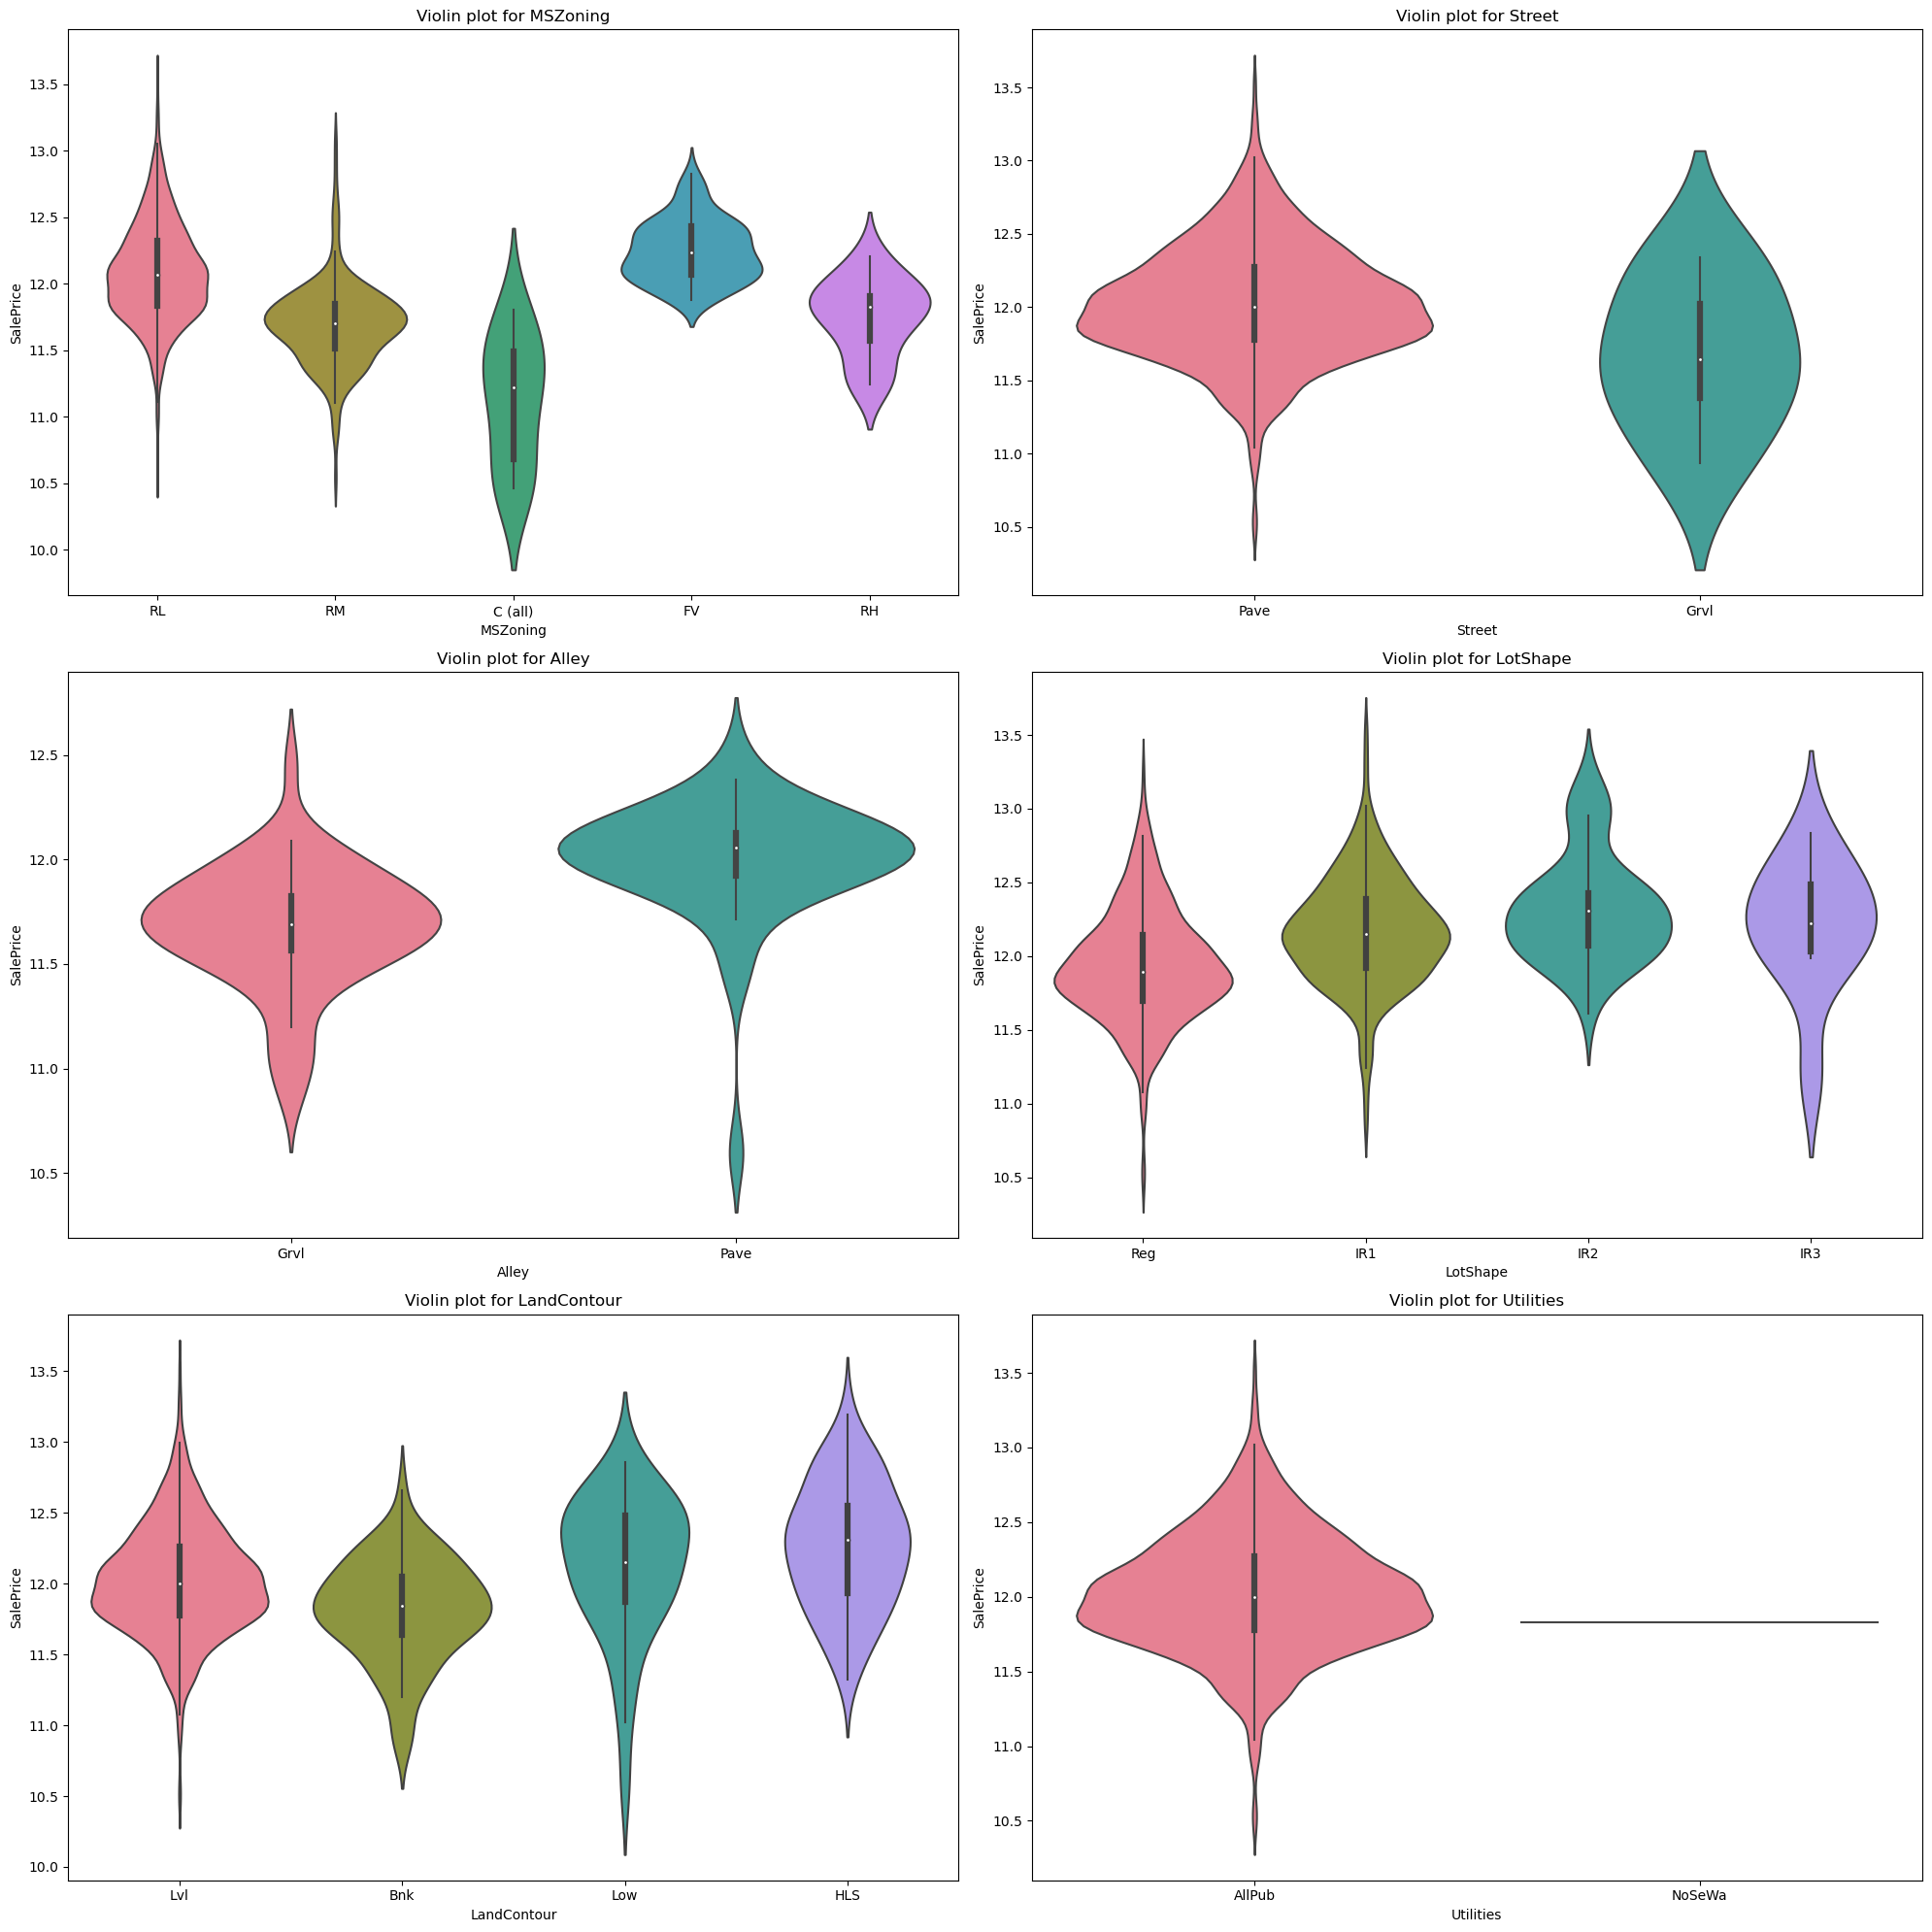

In [17]:
# Limiter à 6 premières variables seulement
selected_features = categorical_features[:6]

ncols = 2  # nombre de colonnes dans le sous-graphe
nrows = -(-len(selected_features) // ncols)  # calcul du nombre de lignes

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.ravel()  # aplatir les axes pour itération facile

for i, col_name in enumerate(selected_features):
    ax = axes[i]
    sns.violinplot(x=col_name, y=log_y, data=data, palette='husl', ax=ax)
    ax.set_title(f'Violin plot for {col_name}')

# Masquer les axes restants si le nombre de variables est inférieur au nombre total d'axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # ajuster l'espacement pour éviter le chevauchement
plt.show()

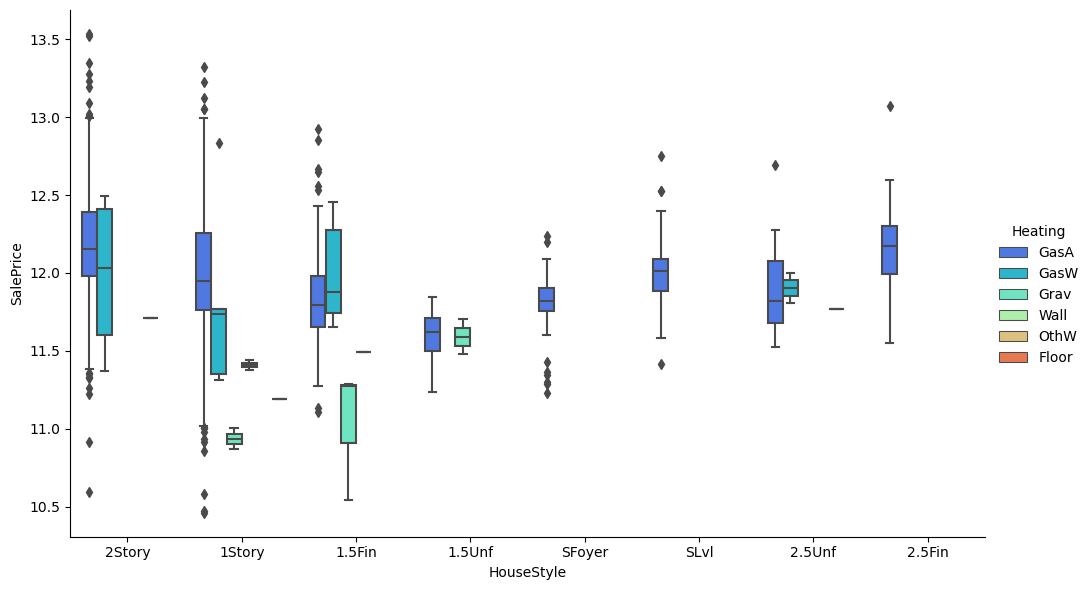

In [18]:
sns.catplot(kind="box", x='HouseStyle', y=log_y, hue='Heating',
            data=data, palette='rainbow', height=6, aspect=2);

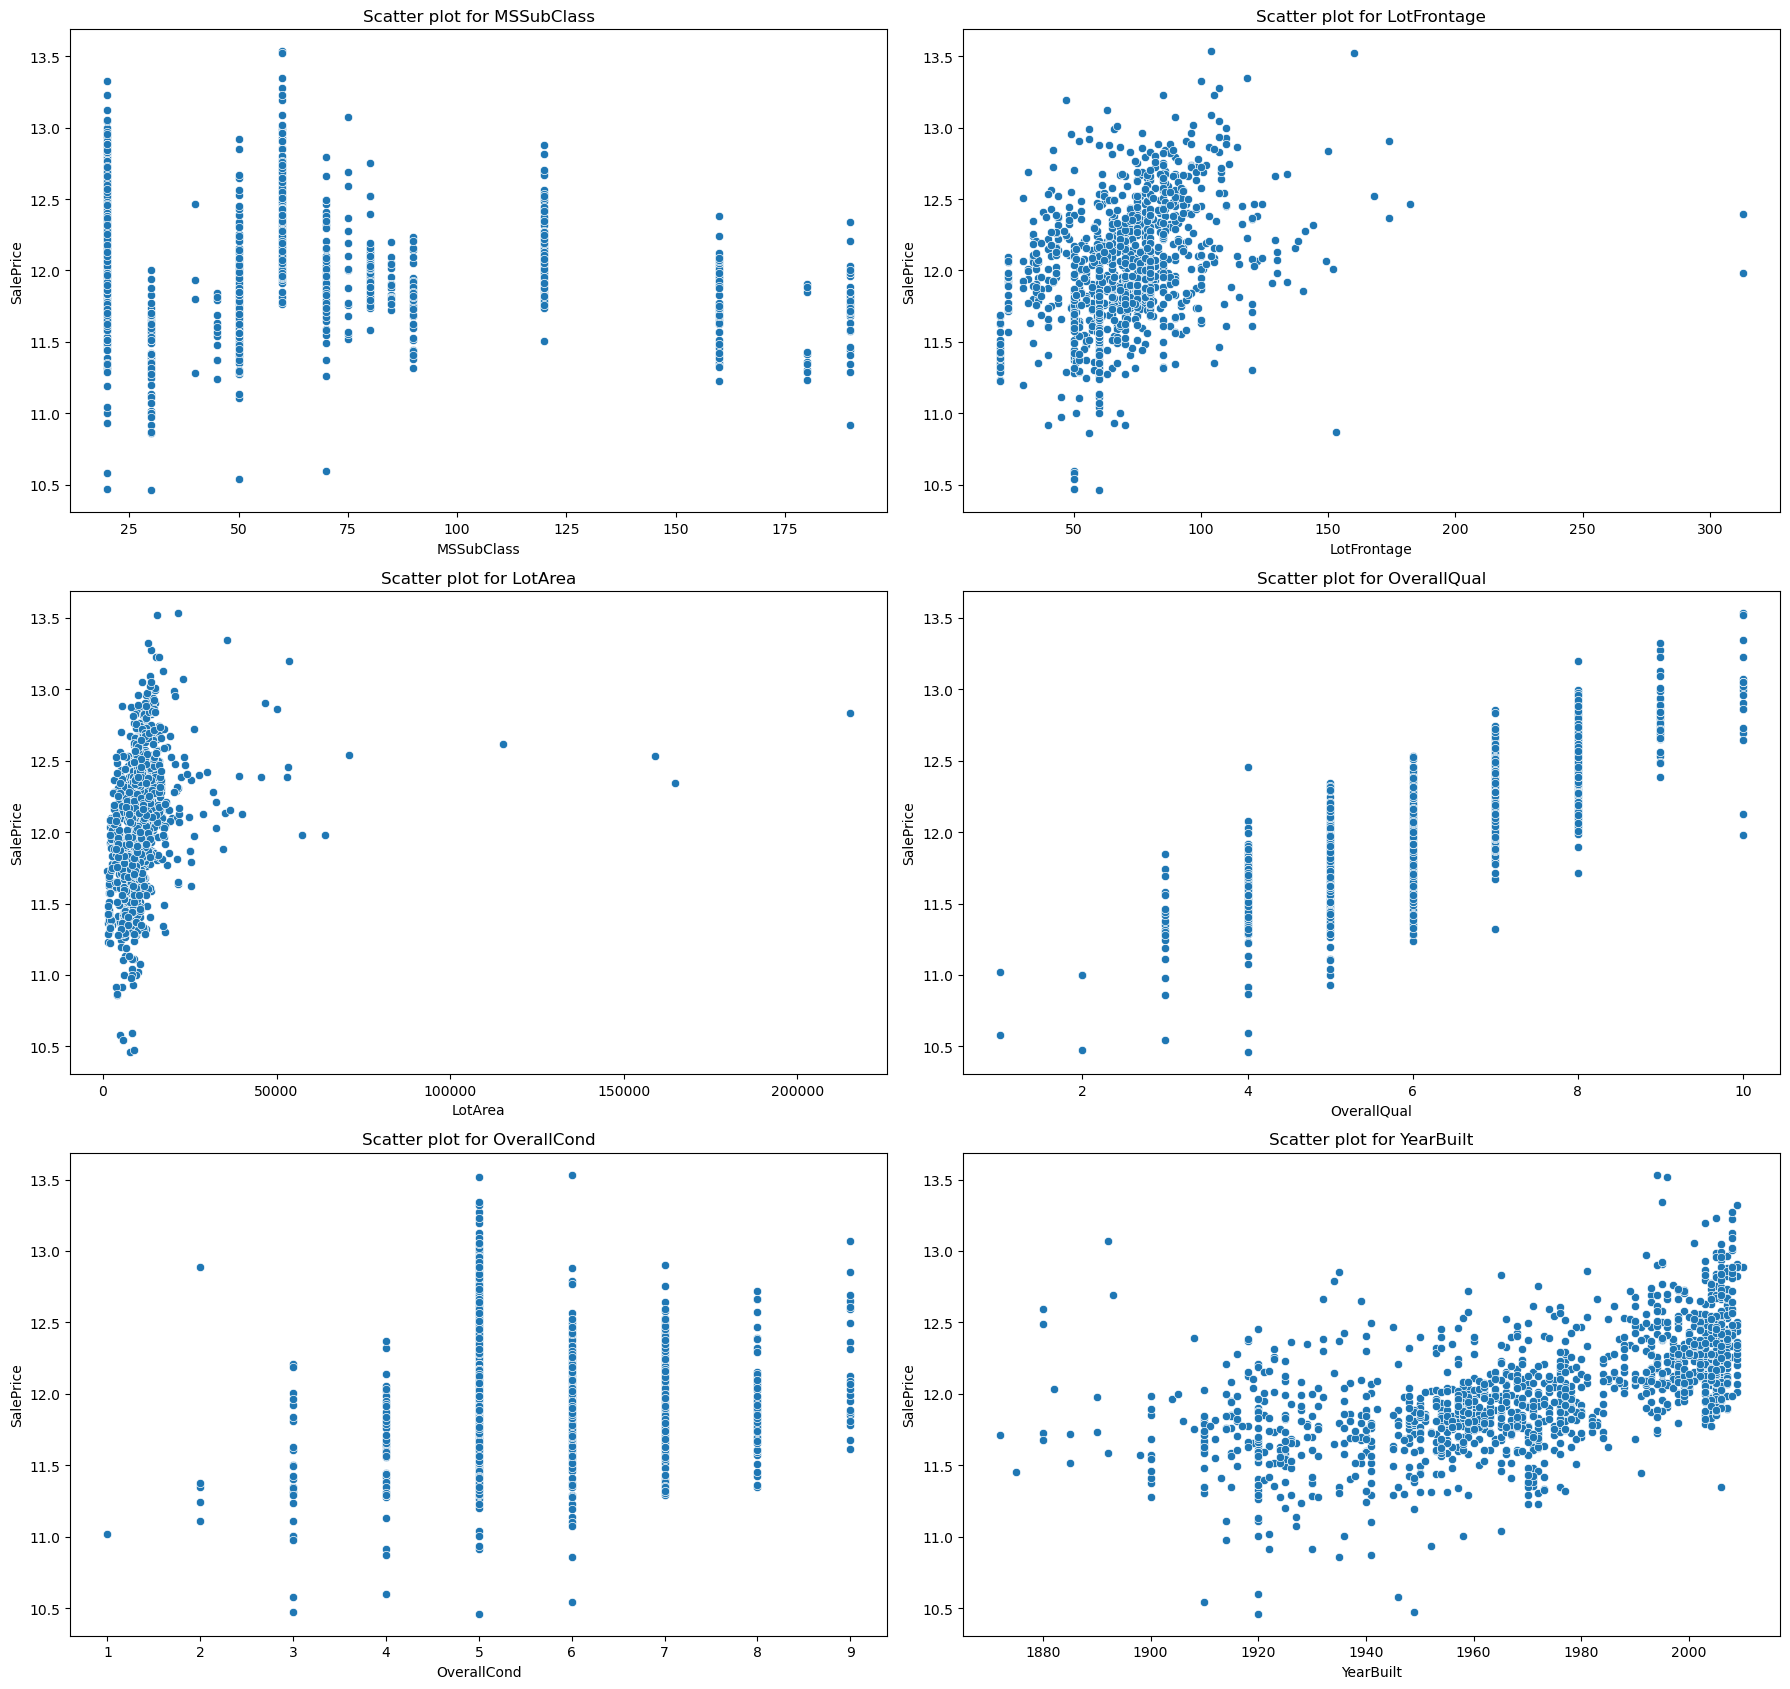

In [19]:
# Limiter aux 6 premières variables numériques
selected_numerical_features = numerical_features[:6]

ncols = 2  # Nombre de colonnes dans le sous-graphe
nrows = -(-len(selected_numerical_features) // ncols)  # Calcul du nombre de lignes

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 17))
axes = axes.ravel()  # Aplatir les axes pour itération facile

for i, col_name in enumerate(selected_numerical_features):
    sns.scatterplot(x=col_name, y=log_y, data=data, ax=axes[i])
    axes[i].set_title(f'Scatter plot for {col_name}')

# Masquer les axes restants si le nombre de variables est inférieur au nombre total d'axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajuster l'espacement pour éviter le chevauchement
plt.show()

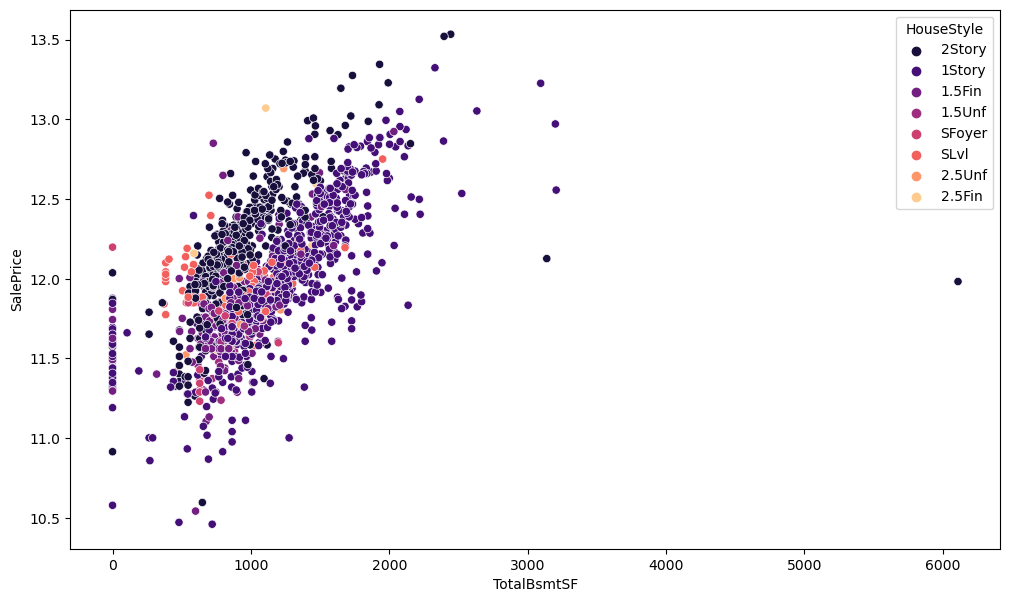

In [20]:
#graphique de dispersion où l'axe X représente la superficie du sous-sol (TotalBsmtSF), l'axe Y représente la variable log_y
#(une transformation logaritmique de votre variable cible), 
#et chaque point est coloré selon le style de la maison (HouseStyle).
plt.figure(figsize=(12, 7))
sns.scatterplot(x='TotalBsmtSF', y=log_y, data=data, palette='magma', hue='HouseStyle',);

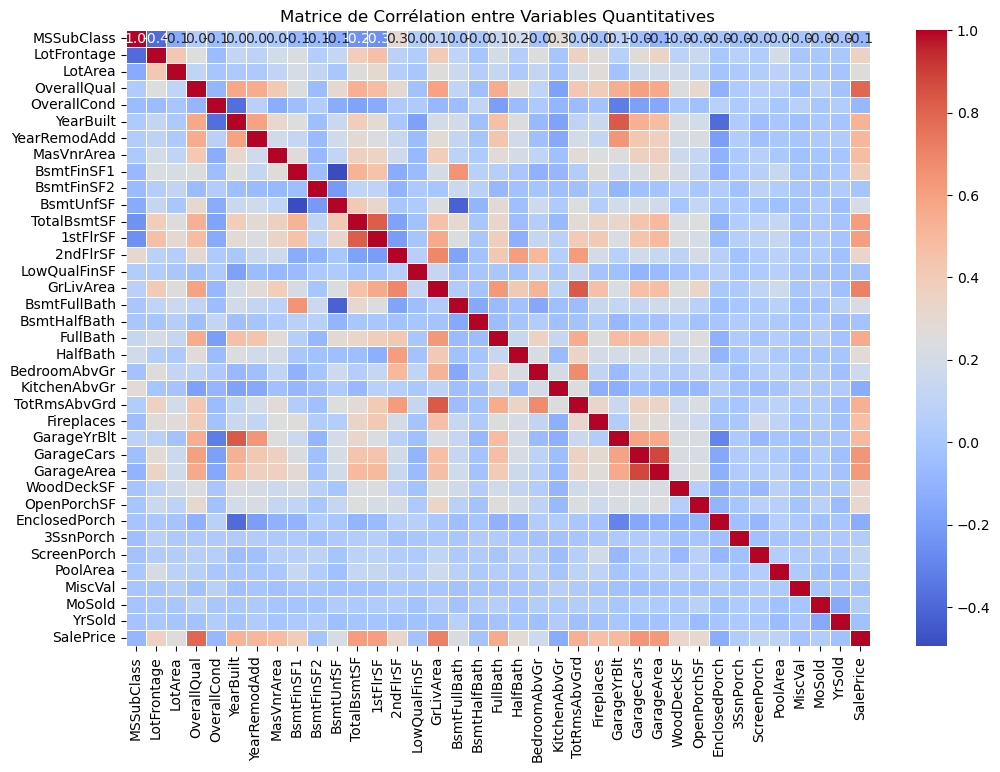

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les variables quantitatives (numériques) du DataFrame
numerical_data = data[numerical_features]

# Calcul de la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Affichage de la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 8))  # Ajuster la taille de la figure pour plus de lisibilité
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='0.1f', cbar=True, linewidths=0.5)
plt.title('Matrice de Corrélation entre Variables Quantitatives')
plt.show()


### Data Preprocessing
Encoding
Les algorithmes d'apprentissage automatique ne peuvent pas travailler avec des données catégorielles directement, les données catégorielles doivent être converties en nombres.
    1- Label Encoding
    2- One hot encoding
    3- Dummy variable trap
    
**Label encoding** consiste à transformer les étiquettes de mots en forme numérique afin que les algorithmes puissent comprendre comment opérer sur elles.

A **One hot encoding** est une représentation des variables catégorielles sous forme de vecteurs binaires, ce qui permet de représenter les données catégorielles de manière plus expansive. Il faut d'abord que les valeurs catégorielles soient converties en valeurs entières, c'est-à-dire en codage d'étiquettes. Ensuite, chaque valeur entière est représentée sous la forme d'un vecteur binaire composé de toutes les valeurs nulles, à l'exception de l'indice de la valeur entière, qui est marqué d'un 1.

The **Dummy variable** est un scénario dans lequel les variables indépendantes sont multicollinéaires, un scénario dans lequel deux variables ou plus sont fortement corrélées en termes simples, une variable pouvant être prédite à partir des autres.

In [23]:
X_encode = pd.get_dummies(data=data, prefix='OHE', prefix_sep='_',
                           columns=categorical_features,
                           drop_first=True,
                           dtype='int8')
X_encode

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,OHE_FV,OHE_RH,OHE_RL,OHE_RM,OHE_Pave,OHE_Pave,OHE_IR2,OHE_IR3,OHE_Reg,OHE_HLS,OHE_Low,OHE_Lvl,OHE_NoSeWa,OHE_CulDSac,OHE_FR2,OHE_FR3,OHE_Inside,OHE_Mod,OHE_Sev,OHE_Blueste,OHE_BrDale,OHE_BrkSide,OHE_ClearCr,OHE_CollgCr,OHE_Crawfor,OHE_Edwards,OHE_Gilbert,OHE_IDOTRR,OHE_MeadowV,OHE_Mitchel,OHE_NAmes,OHE_NPkVill,OHE_NWAmes,OHE_NoRidge,OHE_NridgHt,OHE_OldTown,OHE_SWISU,OHE_Sawyer,OHE_SawyerW,OHE_Somerst,OHE_StoneBr,OHE_Timber,OHE_Veenker,OHE_Feedr,OHE_Norm,OHE_PosA,OHE_PosN,OHE_RRAe,OHE_RRAn,OHE_RRNe,OHE_RRNn,OHE_Feedr,OHE_Norm,OHE_PosA,OHE_PosN,OHE_RRAe,OHE_RRAn,OHE_RRNn,OHE_2fmCon,OHE_Duplex,OHE_Twnhs,OHE_TwnhsE,OHE_1.5Unf,OHE_1Story,OHE_2.5Fin,OHE_2.5Unf,OHE_2Story,OHE_SFoyer,OHE_SLvl,OHE_Gable,OHE_Gambrel,OHE_Hip,OHE_Mansard,OHE_Shed,OHE_CompShg,OHE_Membran,OHE_Metal,OHE_Roll,OHE_Tar&Grv,OHE_WdShake,OHE_WdShngl,OHE_AsphShn,OHE_BrkComm,OHE_BrkFace,OHE_CBlock,OHE_CemntBd,OHE_HdBoard,OHE_ImStucc,OHE_MetalSd,OHE_Plywood,OHE_Stone,OHE_Stucco,OHE_VinylSd,OHE_Wd Sdng,OHE_WdShing,OHE_AsphShn,OHE_Brk Cmn,OHE_BrkFace,OHE_CBlock,OHE_CmentBd,OHE_HdBoard,OHE_ImStucc,OHE_MetalSd,OHE_Other,OHE_Plywood,OHE_Stone,OHE_Stucco,OHE_VinylSd,OHE_Wd Sdng,OHE_Wd Shng,OHE_BrkFace,OHE_Stone,OHE_Fa,OHE_Gd,OHE_TA,OHE_Fa,OHE_Gd,OHE_Po,OHE_TA,OHE_CBlock,OHE_PConc,OHE_Slab,OHE_Stone,OHE_Wood,OHE_Fa,OHE_Gd,OHE_TA,OHE_Gd,OHE_Po,OHE_TA,OHE_Gd,OHE_Mn,OHE_No,OHE_BLQ,OHE_GLQ,OHE_LwQ,OHE_Rec,OHE_Unf,OHE_BLQ,OHE_GLQ,OHE_LwQ,OHE_Rec,OHE_Unf,OHE_GasA,OHE_GasW,OHE_Grav,OHE_OthW,OHE_Wall,OHE_Fa,OHE_Gd,OHE_Po,OHE_TA,OHE_Y,OHE_FuseF,OHE_FuseP,OHE_Mix,OHE_SBrkr,OHE_Fa,OHE_Gd,OHE_TA,OHE_Maj2,OHE_Min1,OHE_Min2,OHE_Mod,OHE_Sev,OHE_Typ,OHE_Fa,OHE_Gd,OHE_Po,OHE_TA,OHE_Attchd,OHE_Basment,OHE_BuiltIn,OHE_CarPort,OHE_Detchd,OHE_RFn,OHE_Unf,OHE_Fa,OHE_Gd,OHE_Po,OHE_TA,OHE_Fa,OHE_Gd,OHE_Po,OHE_TA,OHE_P,OHE_Y,OHE_Fa,OHE_Gd,OHE_GdWo,OHE_MnPrv,OHE_MnWw,OHE_Othr,OHE_Shed,OHE_TenC,OHE_CWD,OHE_Con,OHE_ConLD,OHE_ConLI,OHE_ConLw,OHE_New,OHE_Oth,OHE_WD,OHE_AdjLand,OHE_Alloca,OHE_Family,OHE_Normal,OHE_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70

In [24]:
# Lets verify the dummy variable process
print('Columns in original data frame:\n', data.columns)
print('\nColumns in data frame after encoding dummy variable:\n', X_encode.columns)
print('\nNumber of rows and columns in the dataset:', X_encode.shape)

Columns in original data frame:
 Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'Gara

In [25]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                      ("scaler", StandardScaler())]
                              )

categorical_transformer = make_pipeline(*[SimpleImputer(strategy="constant", fill_value="missing"),
                                          OneHotEncoder(handle_unknown="ignore")]
                                       )


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)
reg

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('scale...
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

## Modeling - Linear Regression

### Train/test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, log_y, test_size=0.25, random_state=23)

### Linear regression

In [30]:
reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('scale...
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

### Model evaluation

In [32]:
# sklearn regression module
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [33]:
def get_performances(real_value, estimated_value, metrics):
    perfs = []
    for metric_func in metrics:
        perfs.append((metric_func.__name__, metric_func(real_value, estimated_value)))
    return pd.DataFrame(perfs, columns=["metric", "value"])


def get_all_performances(value_train, values_test, metrics):
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [34]:
METRICS = [r2_score,
           mean_squared_error,
           mean_absolute_percentage_error,
           max_error,
          ]
# get performance on single set
get_performances(real_value=y_test, estimated_value=y_test_pred, metrics=METRICS)

,metric,value
0,r2_score,0.945972
1,mean_squared_error,0.008382
2,mean_absolute_percentage_error,0.005138
3,max_error,0.515488


In [35]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,0.975888,0.945972
1,mean_squared_error,0.003878,0.008382
2,mean_absolute_percentage_error,0.003583,0.005138
3,max_error,0.360577,0.515488


### Model Validation
In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

- Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This - can be checked by scatter ploting Actual value Vs Predicted value
- The residual error plot should be normally distributed.
- The mean of residual error should be 0 or close to 0 as much as possible
- The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
- Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation. [Math Processing Error], If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
- Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

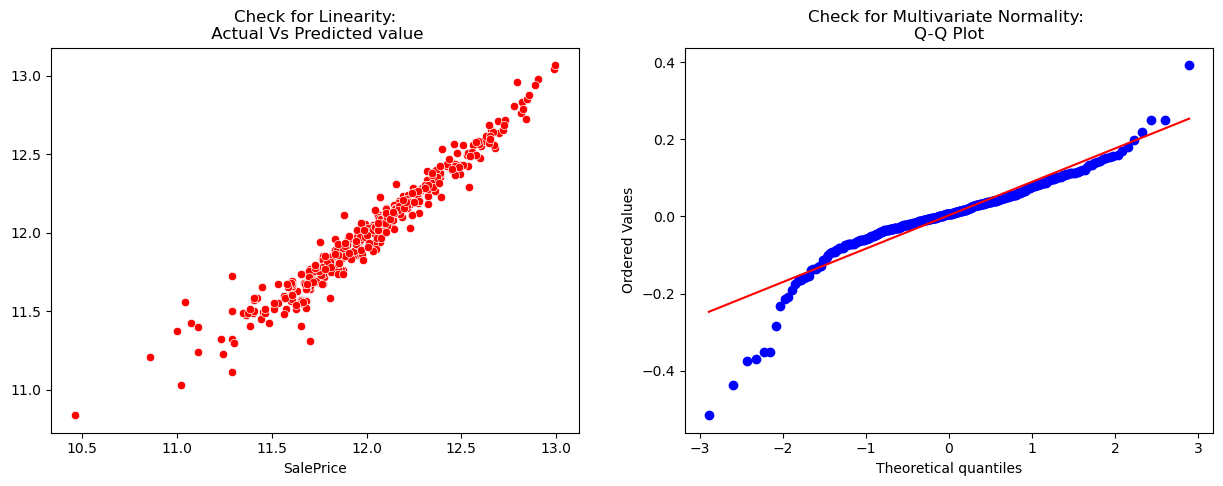

In [73]:
# Check for Linearity
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = axes[0]
g = sns.scatterplot(x=y_test, y=y_test_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = axes[1]
residus = y_test - y_test_pred
_, (_, _, r)= sp.stats.probplot(residus, fit=True,plot=ax)
ax.set_title('Check for Multivariate Normality: \nQ-Q Plot');

In [75]:
# Check for Multicollinearity
# Variance Inflation Factor (VIF)
R_square_test = mean_squared_error(y_test, y_test_pred, squared=True)
VIF = 1/(1- R_square_test)
VIF

1.0084532433975002

### Tuning hyperpameters

In [ ]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "regressor__fit_intercept": [True, False],
}

grid_search = GridSearchCV(reg, param_grid, cv=10, scoring="r2", return_train_score=True) # r2
# you can see the list of key for scoring: sorted(sklearn.metrics.SCORERS.keys())
grid_search

In [ ]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

In [ ]:
grid_cv_results = grid_search.cv_results_
for group in ["train", "test"]:
    mean_score = round(100 * grid_cv_results[f'mean_{group}_score'].mean(), 2)
    mean_std_score = round(grid_cv_results[f'std_{group}_score'].mean(), 2)
    print(f"{group}====================\nMean score (std): {mean_score} ({mean_std_score})\n")

In [ ]:
print(f"Internal CV score: {grid_search.best_score_: .3f}")

In [ ]:
cv_results = pd.DataFrame(grid_cv_results)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[["mean_train_score", "std_train_score",
            "mean_test_score", "std_test_score",
            "mean_fit_time", "std_fit_time",
            "mean_score_time", "std_score_time"
           ]]

In [ ]:
#cross validation only
cv_results = cross_validate(reg,
                            X_train, y_train,
                            cv=5,
                            scoring=('r2', 'neg_mean_squared_error'),
                            return_train_score=True)
pd.DataFrame(cv_results)

### Feature importances

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
print(f"Model score - training data: {reg.score(X_train, y_train)}")
print(f"Model score - test data: {reg.score(X_test, y_test)}")

In [ ]:
reg_estimator = reg["regressor"]

In [ ]:
def get_input_features(model_pipeline, cat_step_name):
    """ Get model feature names used in training
    
    """

    all_feature_names = []

    for step_name, pipe_trans, feat_names in reg["preprocessor"].transformers_:
        if step_name == cat_step_name:
            all_feature_names.extend(pipe_trans
                                 .named_steps["onehotencoder"]
                                 .get_feature_names(input_features=categorical_features)
                                )
        else:
            all_feature_names.extend(feat_names)
    return all_feature_names

In [ ]:
model_features = get_input_features(model_pipeline=reg, cat_step_name="cat")
model_features

In [ ]:
def get_input_features(model_pipeline, cat_step_name):
    all_feature_names = []
    
    # Récupération des étapes du préprocesseur dans le pipeline
    for step_name, pipe_trans, feat_names in model_pipeline["preprocessor"].transformers_:
        if step_name == cat_step_name:
            # Récupérer les noms des caractéristiques encodées après OneHotEncoder
            all_feature_names.extend(pipe_trans.named_steps["onehotencoder"]
                                     .get_feature_names_out(input_features=categorical_features)
                                     )
        else:
            all_feature_names.extend(feat_names)
    
    return all_feature_names


In [ ]:
df_feature_importance = pd.DataFrame(reg_estimator.coef_, columns=["coef"], index=model_features)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

In [ ]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

## Ridge

### Define pipeline

In [ ]:
def define_pipeline(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    """ Construct a Pipeline from the given transfomers & estimators
    """
    if not parameters:
        parameters = dict()
    numeric_transformer = make_pipeline(*numeric_transformer)
    categorical_transformer = make_pipeline(*categorical_transformer)


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )

    # Append estimator to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    return Pipeline(steps=[("preprocessor", preprocessor), ("regressor", estimator(**parameters))])
    

### Modeling

In [ ]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                       StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_ridge = define_pipeline(estimator=RidgeCV,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_ridge

### Cross validation

In [ ]:
# cross validation only
cv_results = cross_validate(reg_ridge,
                            X_train, y_train,
                            cv=5,
                            scoring=("r2", "neg_mean_squared_error",
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_ridge = pd.DataFrame(cv_results)
cv_result_ridge

In [ ]:
cv_result_ridge[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));

In [ ]:
reg_ridge.fit(X_train, y_train)
print(f"Model score - training data: {reg_ridge.score(X_train, y_train)}")
print(f"Model score - test data: {reg_ridge.score(X_test, y_test)}")

In [ ]:
ridge_model_features = get_input_features(model_pipeline=reg_ridge, cat_step_name="cat")

df_feature_importance_ridge = pd.DataFrame(reg_ridge.named_steps["regressor"].coef_, columns=["coef"], index=model_features)
print(f"Shape: {df_feature_importance_ridge.shape}")
df_feature_importance_ridge.head()

### Feature importances

In [ ]:
# top30 most important features
(df_feature_importance_ridge
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

## todo
 - Lasso
 - Elasticnet